# <center> ML Course Project </center>
# <center> Traffic Sign Recognition using Eigenfaces Approach </center>

***

## Importing necessary Python Libraries

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Importing path for image dataset

In [3]:
IMG_FOLDER = 'C:/Users/jathi/Documents/ML/Signs'
set_files = os.listdir(IMG_FOLDER)
len(set_files)

660

## Cropping and resizing images

In [4]:
#Do not run this code as it has already modified the dataset
'''
df=pd.read_csv('TsignRecgTrain4170Annotation.csv')
ar=np.array(df)

width = 128
height = 128
for filename in os.listdir(IMG_FOLDER):
  image = Image.open(IMG_FOLDER + '/' + filename)
  for i in range(len(df)):
    if(ar[i][0]==filename):
      x1 = ar[i][3]
      y1 = ar[i][4]
      x2 = ar[i][5]
      y2 = ar[i][6]  
      cropped_im = image.crop((x1, y1, x2, y2))
      resized_image = cropped_im.resize((width, height))
      resized_image.save(IMG_FOLDER + '/' + filename)
      break
'''

"\ndf=pd.read_csv('TsignRecgTrain4170Annotation.csv')\nar=np.array(df)\n\nwidth = 128\nheight = 128\nfor filename in os.listdir(IMG_FOLDER):\n  image = Image.open(IMG_FOLDER + '/' + filename)\n  for i in range(len(df)):\n    if(ar[i][0]==filename):\n      x1 = ar[i][3]\n      y1 = ar[i][4]\n      x2 = ar[i][5]\n      y2 = ar[i][6]  \n      cropped_im = image.crop((x1, y1, x2, y2))\n      resized_image = cropped_im.resize((width, height))\n      resized_image.save(IMG_FOLDER + '/' + filename)\n      break\n"

## Splitting data into train and test sets

In [5]:
#Do not run this code as it has already modified the dataset
'''
set_files = os.listdir(IMG_FOLDER)
TRAIN_FOLDER = 'C:/Users/jathi/Documents/ML/Train'
TEST_FOLDER = 'C:/Users/jathi/Documents/ML/Test'

for i in range(44):
    for j in range(12):
        image = Image.open(IMG_FOLDER + '/' + set_files[15*i+j])
        image.save(TRAIN_FOLDER + '/' + set_files[15*i+j])
    for j in range(3):
        image = Image.open(IMG_FOLDER + '/' + set_files[15*i+12+j])
        image.save(TEST_FOLDER + '/' + set_files[15*i+12+j])
'''

"\nset_files = os.listdir(IMG_FOLDER)\nTRAIN_FOLDER = 'C:/Users/jathi/Documents/ML/Train'\nTEST_FOLDER = 'C:/Users/jathi/Documents/ML/Test'\n\nfor i in range(44):\n    for j in range(12):\n        image = Image.open(IMG_FOLDER + '/' + set_files[15*i+j])\n        image.save(TRAIN_FOLDER + '/' + set_files[15*i+j])\n    for j in range(3):\n        image = Image.open(IMG_FOLDER + '/' + set_files[15*i+12+j])\n        image.save(TEST_FOLDER + '/' + set_files[15*i+12+j])\n"

## Importing path for training images dataset

In [6]:
TRAIN_IMG_FOLDER = 'C:/Users/jathi/Documents/ML/Train'
train_set_files = os.listdir(TRAIN_IMG_FOLDER)
len(train_set_files)

528

## Extracting labels for traffic signs from their file names

In [7]:
train_id_file = set([f.split('_')[0] for f in train_set_files])
train_id_file=list(train_id_file)
train_id_file.sort()
print(len(train_id_file))

44


## Creating a list containing traffic sign labels

In [8]:
train_labels=[]
for i in range(len(train_id_file)):
    for j in range(12):
        train_labels.append(train_id_file[i])
print(len(train_labels))

528


In [9]:
test_labels=[]
for i in range(len(train_id_file)):
    for j in range(3):
        test_labels.append(train_id_file[i])
print(len(test_labels))

132


## Training images dataset overview

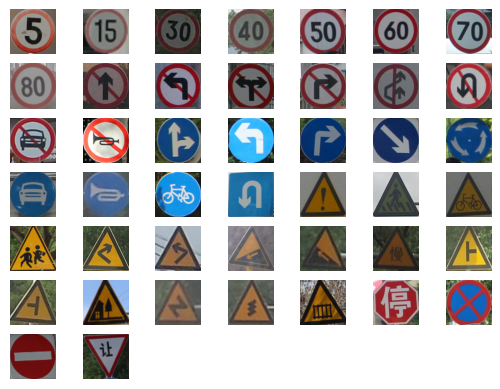

In [10]:
i=0
while(i<len(train_set_files)):
    img = plt.imread(TRAIN_IMG_FOLDER+'/'+train_set_files[i])
    plt.subplot(7,7,int(1+i/12))
    plt.axis('off')
    plt.imshow(img)
    i+=12

## Obtaining training images using file names

In [11]:
training_images=[]
for filename in train_set_files:
    img = cv2.imread(os.path.join(TRAIN_IMG_FOLDER,filename))
    if img is not None:
        training_images.append(img)

## Converting images to grayscale

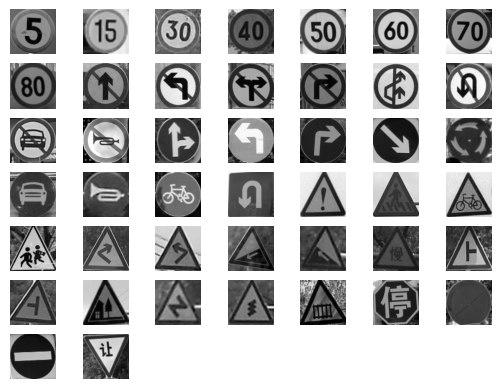

In [12]:
training_images_gray = []
for i in range(len(training_images)):
    training_images_gray.append(cv2.cvtColor(training_images[i], cv2.COLOR_BGR2GRAY))

i=0
while(i<len(training_images_gray)):
    img = Image.fromarray(training_images_gray[i])
    plt.subplot(7,7,int(1+i/12))
    plt.axis('off')
    plt.imshow(img,cmap='gray')
    i+=12

## Converting images to 1-D representation

In [13]:
training_images_gray_1D = []
for i in range(len(training_images_gray)):
    training_images_gray_1D.append(training_images_gray[i].flatten())

## Performing Principal Component Analysis to obtain 10 major PCA components

In [14]:
pca = PCA(n_components=10)
pca.fit(training_images_gray_1D)
training_images_gray_1D_pca = pca.transform(training_images_gray_1D)

## Visualising the PCA components

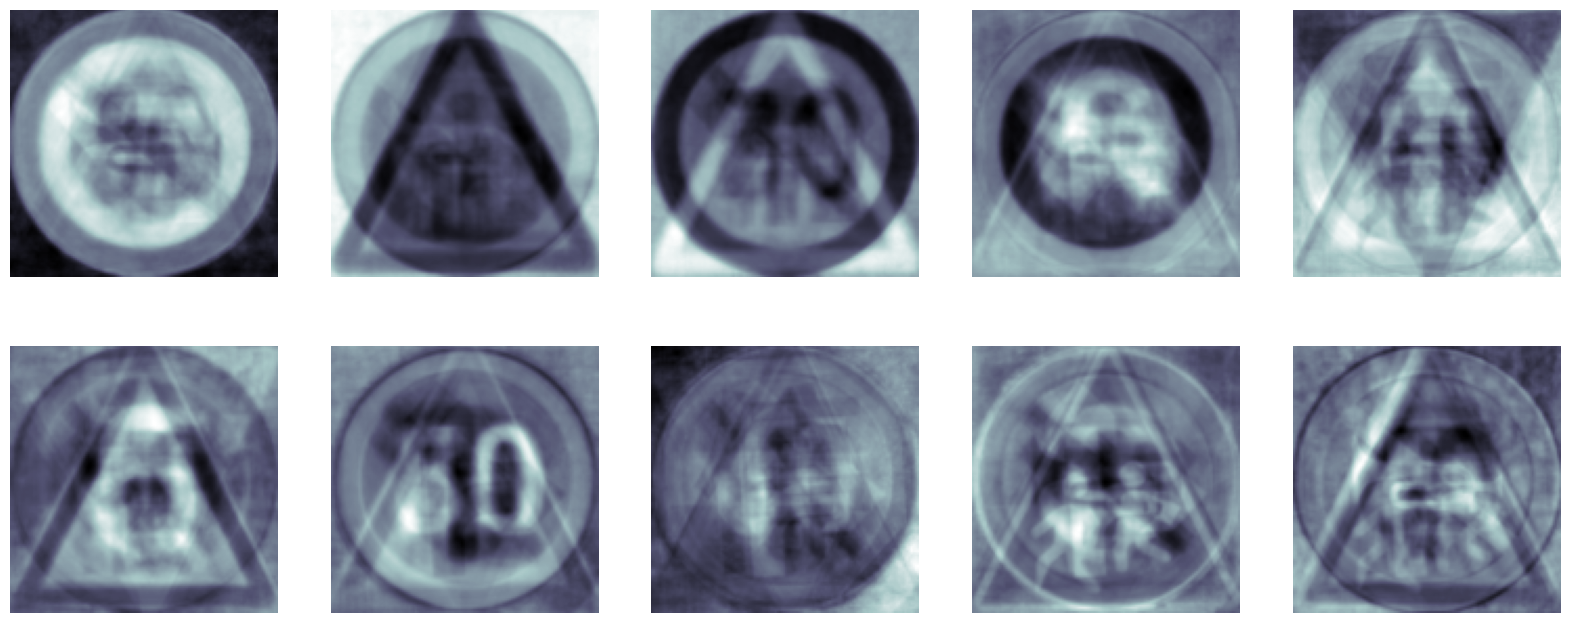

In [15]:
plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(pca.components_[i].reshape(128, 128), cmap=plt.cm.bone)

## Performing Pre-processing on test dataset

In [16]:
Test_IMG_FOLDER = 'C:/Users/jathi/Documents/ML/Test'
test_set_files = os.listdir(Test_IMG_FOLDER)

test_images=[]
for filename in test_set_files:
    img = cv2.imread(os.path.join(Test_IMG_FOLDER,filename))
    if img is not None:
        test_images.append(img)

test_images_gray = []
for i in range(len(test_images)):
    test_images_gray.append(cv2.cvtColor(test_images[i], cv2.COLOR_BGR2GRAY))

test_images_gray_1D = []
for i in range(len(test_images_gray)):
    test_images_gray_1D.append(test_images_gray[i].flatten())

test_images_gray_1D_pca = pca.transform(test_images_gray_1D)

## Predicting test data label using 1-Nearest Neighbour Classifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(training_images_gray_1D_pca, train_labels)

pred=knn.predict(test_images_gray_1D_pca)

## Calculating accuracy of predicted data

In [18]:
print('accuracy is',accuracy_score(test_labels,pred))

accuracy is 0.5909090909090909


## Visualisation of predicted data using confusion matrix

<AxesSubplot: >

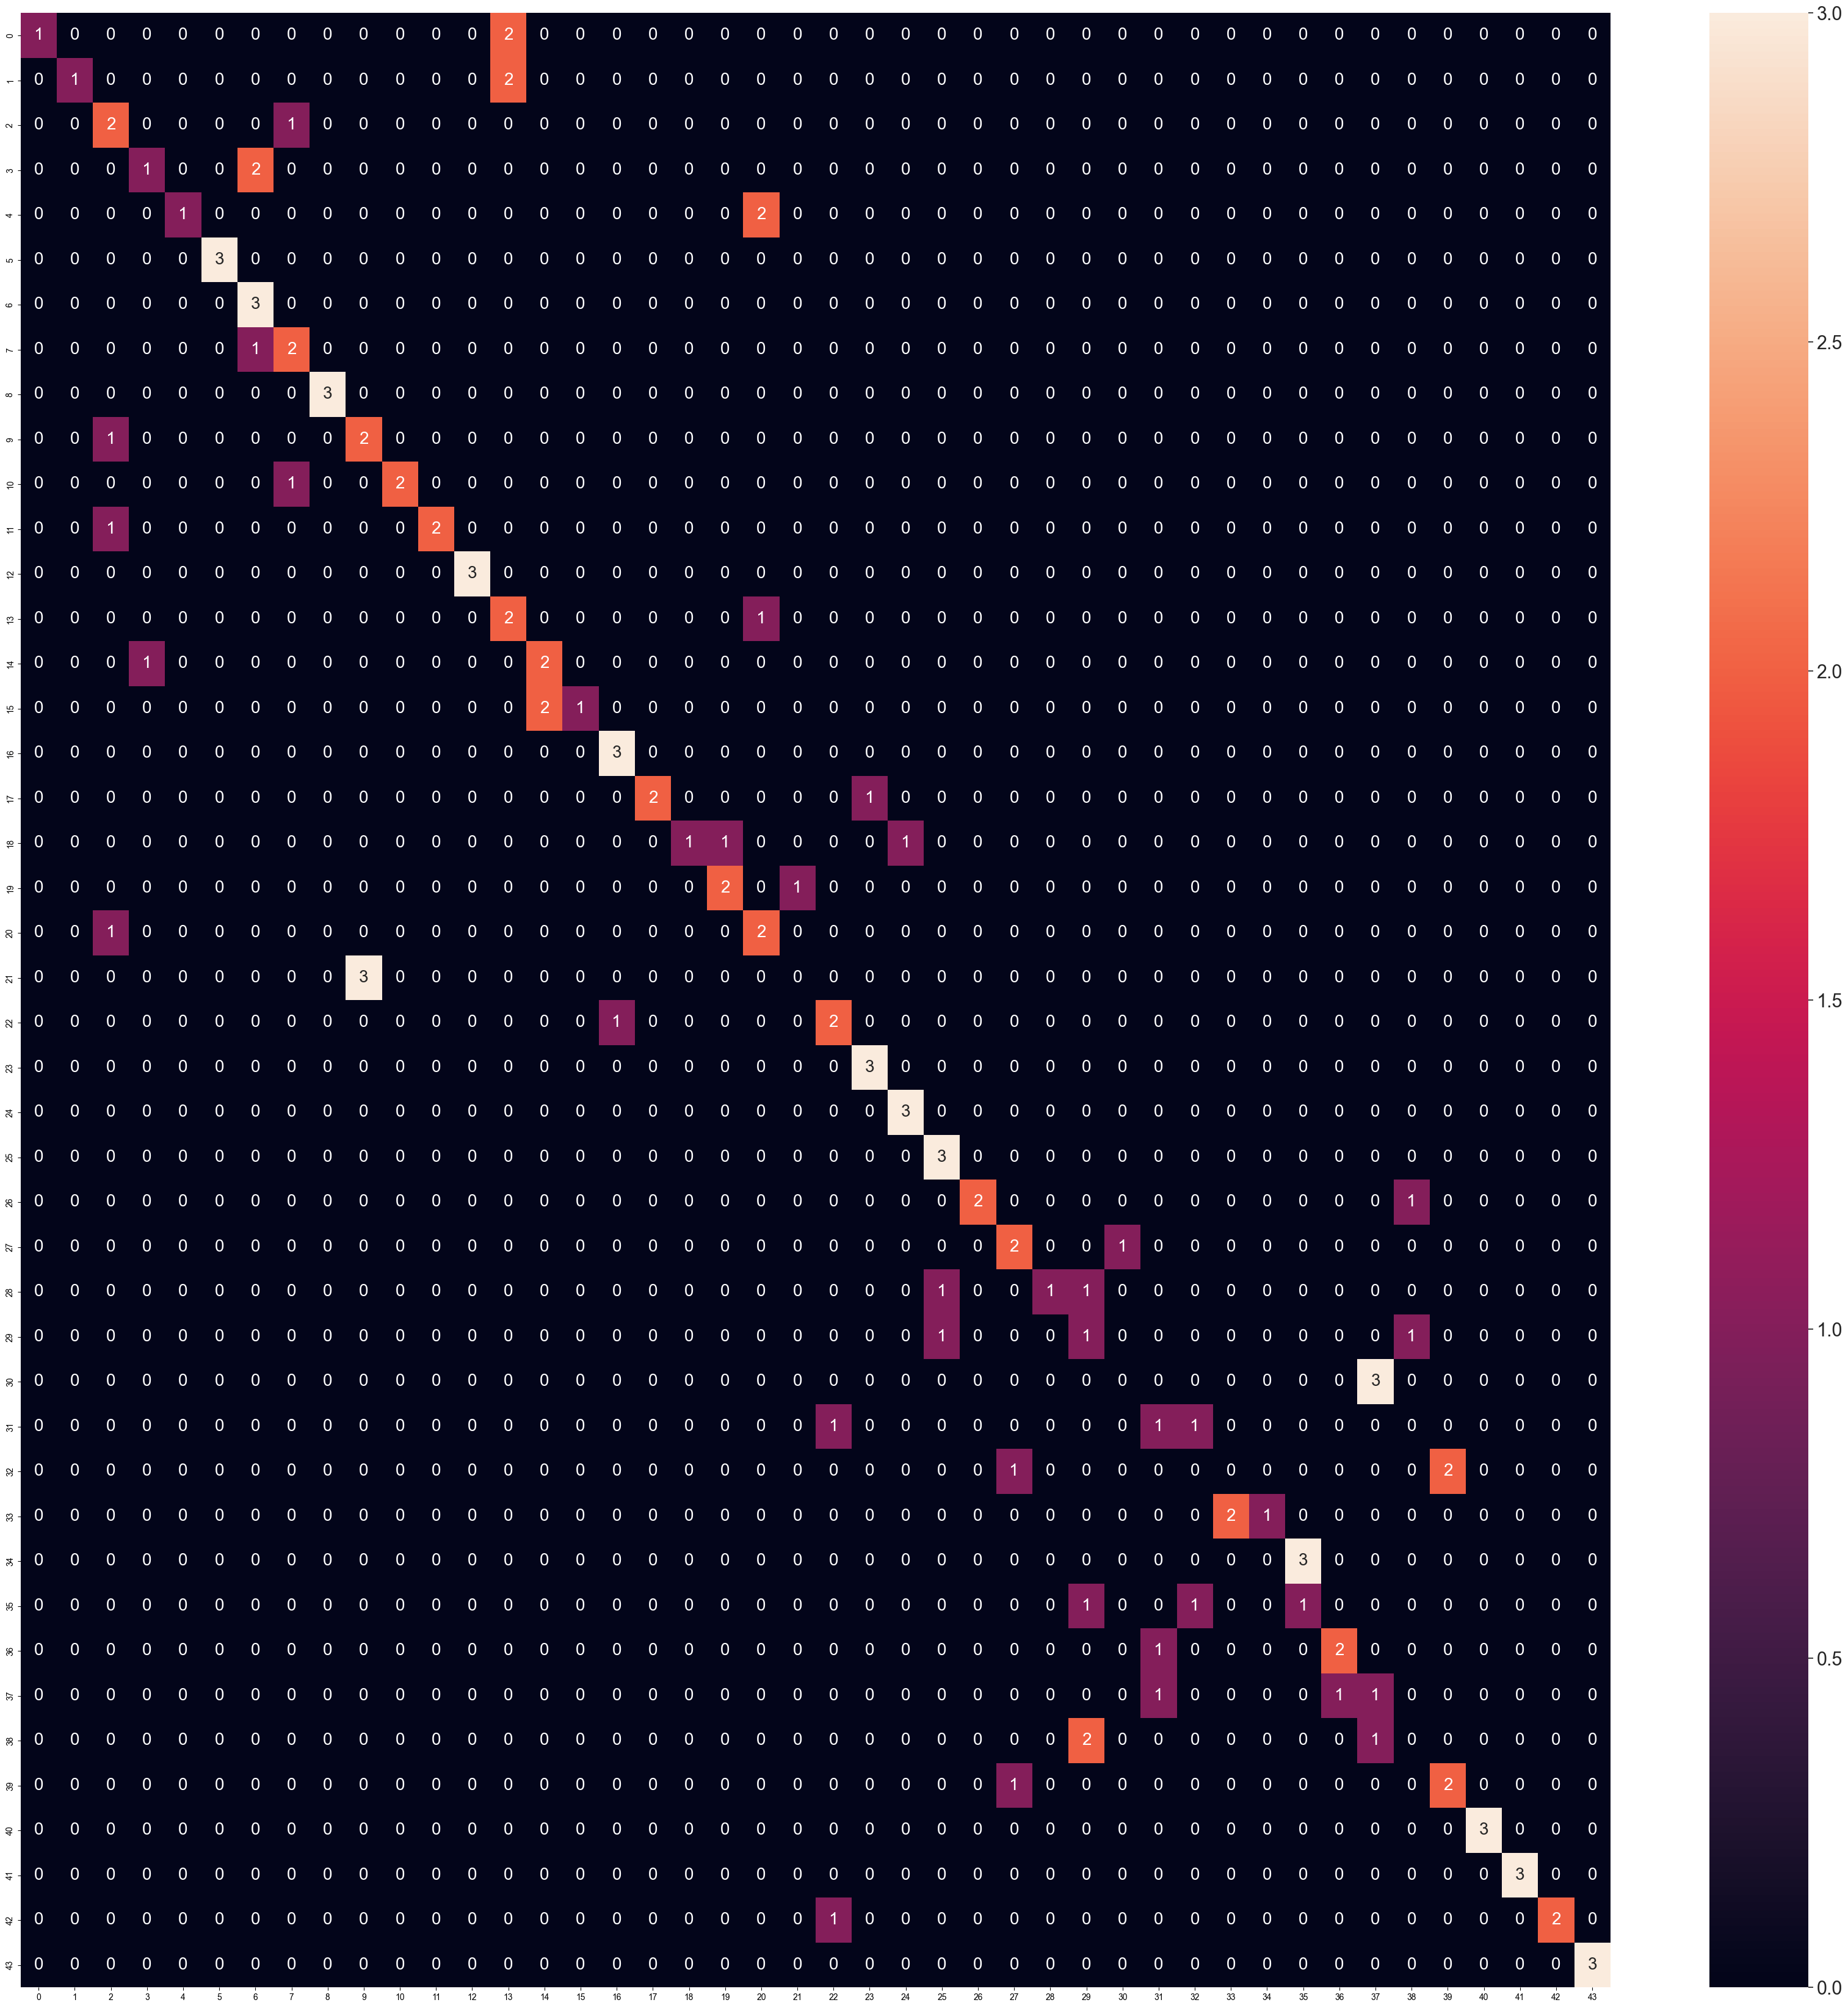

In [19]:
cf_matrix = confusion_matrix(test_labels, pred)
fig, ax = plt.subplots(figsize=(42,42))
sns.set(font_scale=2)
sns.heatmap(cf_matrix, annot=True,ax=ax,annot_kws={'size':20})

## Classification Report

In [20]:
print(classification_report(test_labels, pred,zero_division=0))

              precision    recall  f1-score   support

         000       1.00      0.33      0.50         3
         001       1.00      0.33      0.50         3
         002       0.40      0.67      0.50         3
         003       0.50      0.33      0.40         3
         004       1.00      0.33      0.50         3
         005       1.00      1.00      1.00         3
         006       0.50      1.00      0.67         3
         007       0.50      0.67      0.57         3
         010       1.00      1.00      1.00         3
         011       0.40      0.67      0.50         3
         012       1.00      0.67      0.80         3
         013       1.00      0.67      0.80         3
         014       1.00      1.00      1.00         3
         015       0.33      0.67      0.44         3
         016       0.50      0.67      0.57         3
         017       1.00      0.33      0.50         3
         020       0.75      1.00      0.86         3
         022       1.00    

Text(0, 0.5, 'accuracy')

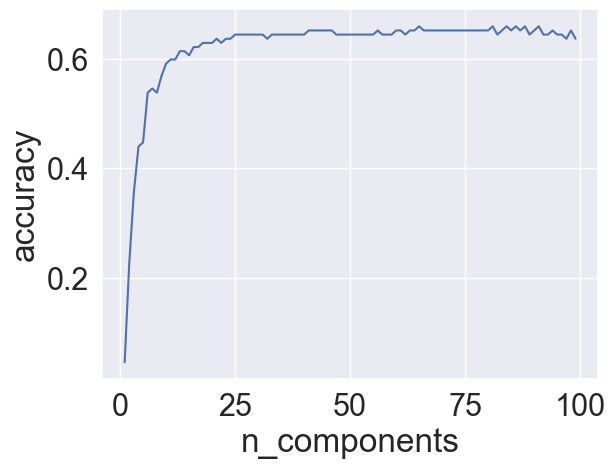

In [21]:
accuracy = []
for i in range(1, 100):
    pca = PCA(n_components=i)
    pca.fit(training_images_gray_1D)
    training_images_gray_1D_pca = pca.transform(training_images_gray_1D)
    knn.fit(training_images_gray_1D_pca, train_labels)
    test_images_gray_1D_pca = pca.transform(test_images_gray_1D)
    accuracy.append(accuracy_score(test_labels, knn.predict(test_images_gray_1D_pca)))
plt.plot(range(1, 100), accuracy)
plt.xlabel('n_components')
plt.ylabel('accuracy')

Best accuracy is obtained for n_neighbors =  1
Best accuracy is  0.5909090909090909


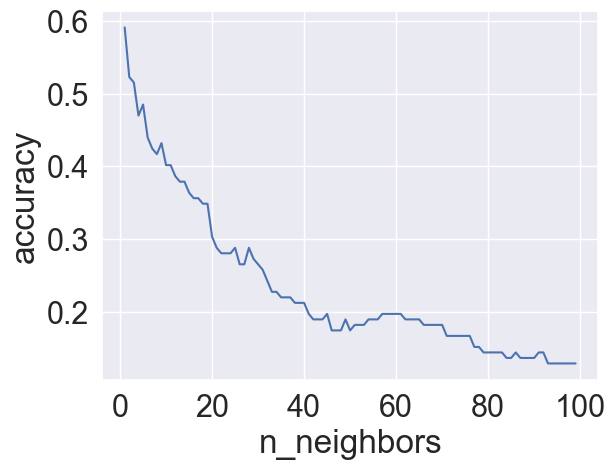

In [22]:
pca = PCA(n_components=10)
pca.fit(training_images_gray_1D)
training_images_gray_1D_pca = pca.transform(training_images_gray_1D)
test_images_gray_1D_pca = pca.transform(test_images_gray_1D)
accuracy = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(training_images_gray_1D_pca, train_labels)
    accuracy.append(accuracy_score(test_labels, knn.predict(test_images_gray_1D_pca)))

plt.plot(range(1, 100), accuracy)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
sns.set(font_scale=1)
accuracy.index(max(accuracy))
print('Best accuracy is obtained for n_neighbors = ', accuracy.index(max(accuracy)) + 1)
print('Best accuracy is ', max(accuracy))